In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#  Visualization

#  Univariate analysis

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

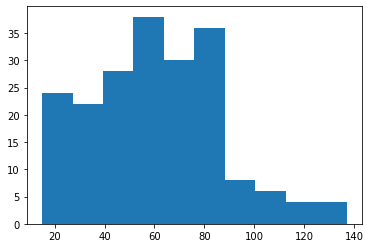

In [5]:
plt.hist(df["Annual Income (k$)"])

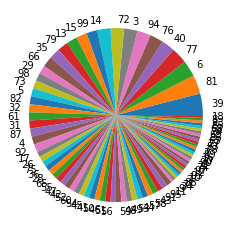

In [8]:
plt.pie(df["Spending Score (1-100)"].value_counts(),labels=df["Spending Score (1-100)"].unique())
plt.show()

#   Bi-variate analysis

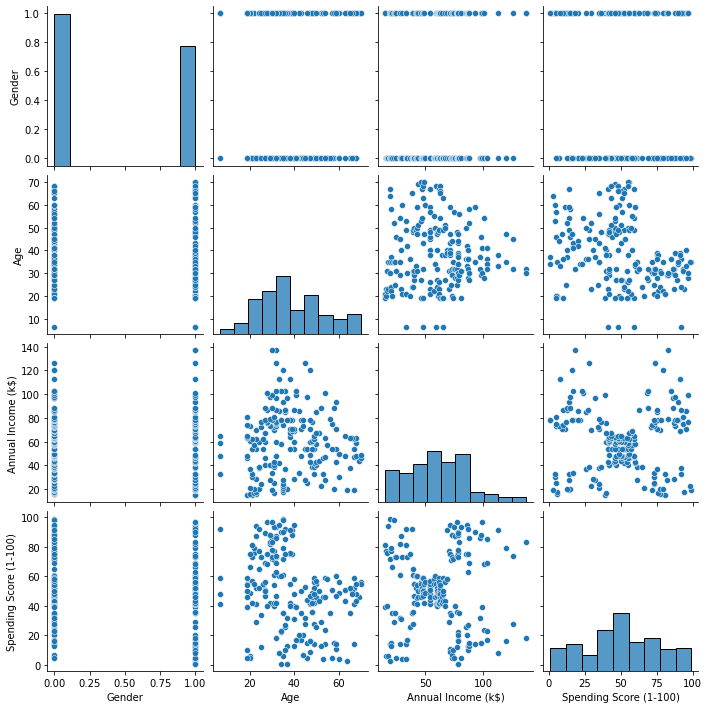

In [28]:
sns.pairplot(df[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])


#    Multi-variate analysis

<AxesSubplot:>

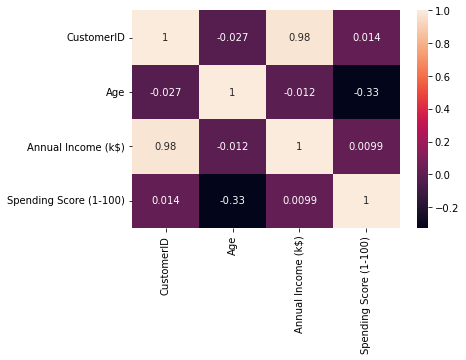

In [13]:
sns.heatmap(df.corr(),annot=True)

#  Perform descriptive statistics on the dataset

In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#  Handle missing values

In [4]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

#  Find the outliers and replace the outliers

<AxesSubplot:xlabel='Annual Income (k$)'>

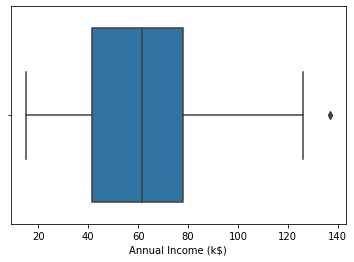

In [29]:
sns.boxplot(x=df["Annual Income (k$)"])

In [18]:
q1=df.Age.quantile(0.25)
q2=df.Age.quantile(0.75)
IQR = q2-q1
upper_limit = q2+1.5*IQR
lower_limit = q2-1.5*IQR
print(upper_limit)
print(lower_limit)
df["Age"].head()

79.375
18.625


0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [19]:
df.median()

C:\Users\admin\AppData\Local\Temp/ipykernel_16652/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [20]:
df["Age"]=np.where(df["Age"]<lower_limit,6.52,df["Age"])

<AxesSubplot:xlabel='Age'>

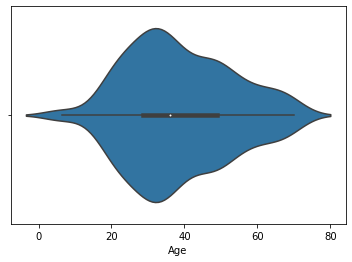

In [21]:
df["Age"]=np.where(df["Age"]<lower_limit,6.52,df["Age"])
sns.violinplot(x=df["Age"])

#  Check for Categorical columns and perform encoding.

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39
1,2,Male,21.0,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40


In [23]:
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19.0,15,39
1,2,1,21.0,15,81
2,3,0,20.0,16,6
3,4,0,23.0,16,77
4,5,0,31.0,17,40


#  Split the data

In [30]:
y=df["Annual Income (k$)"]
x=df.drop("Annual Income (k$)",axis=1)

In [31]:
x

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,1,19.0,39
1,2,1,21.0,81
2,3,0,20.0,6
3,4,0,23.0,77
4,5,0,31.0,40
...,...,...,...,...
195,196,0,35.0,79
196,197,0,45.0,28
197,198,1,32.0,74
198,199,1,32.0,18


# Scale the  variable 

In [82]:
from sklearn.preprocessing import StandardScaler

In [86]:
X1=StandardScaler()
Y1=StandardScaler()
X=X1.fit_transform(X)
Y=Y1.fit_transform(Y)

ValueError: Expected 2D array, got 1D array instead:
array=[39. 81.  6. 77. 40. 76.  6. 94.  3. 72. 14. 99. 15. 77. 13. 79. 35. 66.
 29. 98. 35. 73.  5. 73. 14. 82. 32. 61. 31. 87.  4. 73.  4. 92. 14. 81.
 17. 73. 26. 75. 35. 92. 36. 61. 28. 65. 55. 47. 42. 42. 52. 60. 54. 60.
 45. 41. 50. 46. 51. 46. 56. 55. 52. 59. 51. 59. 50. 48. 59. 47. 55. 42.
 49. 56. 47. 54. 53. 48. 52. 42. 51. 55. 41. 44. 57. 46. 58. 55. 60. 46.
 55. 41. 49. 40. 42. 52. 47. 50. 42. 49. 41. 48. 59. 55. 56. 42. 50. 46.
 43. 48. 52. 54. 42. 46. 48. 50. 43. 59. 43. 57. 56. 40. 58. 91. 29. 77.
 35. 95. 11. 75.  9. 75. 34. 71.  5. 88.  7. 73. 10. 72.  5. 93. 40. 87.
 12. 97. 36. 74. 22. 90. 17. 88. 20. 76. 16. 89.  1. 78.  1. 73. 35. 83.
  5. 93. 26. 75. 20. 95. 27. 63. 13. 75. 10. 92. 13. 86. 15. 69. 14. 90.
 32. 86. 15. 88. 39. 97. 24. 68. 17. 85. 23. 69.  8. 91. 16. 79. 28. 74.
 18. 83.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Split the data into dependent and independent variables

In [48]:
X=df.iloc[:,:-1].values

In [49]:
print(X)

[[  1.     1.    19.    15.  ]
 [  2.     1.    21.    15.  ]
 [  3.     0.    20.    16.  ]
 [  4.     0.    23.    16.  ]
 [  5.     0.    31.    17.  ]
 [  6.     0.    22.    17.  ]
 [  7.     0.    35.    18.  ]
 [  8.     0.    23.    18.  ]
 [  9.     1.    64.    19.  ]
 [ 10.     0.    30.    19.  ]
 [ 11.     1.    67.    19.  ]
 [ 12.     0.    35.    19.  ]
 [ 13.     0.    58.    20.  ]
 [ 14.     0.    24.    20.  ]
 [ 15.     1.    37.    20.  ]
 [ 16.     1.    22.    20.  ]
 [ 17.     0.    35.    21.  ]
 [ 18.     1.    20.    21.  ]
 [ 19.     1.    52.    23.  ]
 [ 20.     0.    35.    23.  ]
 [ 21.     1.    35.    24.  ]
 [ 22.     1.    25.    24.  ]
 [ 23.     0.    46.    25.  ]
 [ 24.     1.    31.    25.  ]
 [ 25.     0.    54.    28.  ]
 [ 26.     1.    29.    28.  ]
 [ 27.     0.    45.    28.  ]
 [ 28.     1.    35.    28.  ]
 [ 29.     0.    40.    29.  ]
 [ 30.     0.    23.    29.  ]
 [ 31.     1.    60.    30.  ]
 [ 32.     0.    21.    30.  ]
 [ 33.  

In [50]:
Y=df.iloc[:,-1].values
print(Y)

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87
 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95
 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69
  8 91 16 79 28 74 18 83]


# Split the data into training and testing

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,test_size=0.3,random_state=20)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(140, 4) (60, 4) (140,) (60,)


In [65]:
xtrain

,CustomerID,Gender,Age,Spending Score (1-100)
131,0.545603,1.128152,0.026428,0.962775
96,-0.060623,-0.886405,0.583389,-0.124229
181,1.411639,-0.886405,-0.460913,1.389812
19,-1.394318,-0.886405,-0.252053,1.855671
153,0.926659,-0.886405,-0.043192,1.001596
...,...,...,...,...
67,-0.562924,-0.886405,2.045411,-0.085407
192,1.602167,1.128152,-0.391293,-1.638270
117,0.303113,-0.886405,0.722629,0.341630
47,-0.909338,-0.886405,-0.809013,-0.124229


In [66]:
xtest

,CustomerID,Gender,Age,Spending Score (1-100)
18,-1.411639,1.128152,0.931489,-0.823017
170,1.221111,1.128152,0.096048,-1.444162
107,0.129905,1.128152,1.070729,-0.163051
98,-0.025981,1.128152,0.653009,-0.318337
177,1.342356,1.128152,-0.809013,0.729845
182,1.428960,1.128152,0.513769,-1.366519
5,-1.636808,-0.886405,-1.157114,1.001596
146,0.805414,1.128152,0.653009,-0.551266
12,-1.515563,-0.886405,1.349210,-1.366519
152,0.909338,-0.886405,0.374528,-1.172411


In [67]:
ytrain

131     71
96      60
181     97
19      23
153     78
      ... 
67      48
192    113
117     65
47      40
172     87
Name: Annual Income (k$), Length: 140, dtype: int64

In [68]:
ytest

18      23
170     87
107     63
98      61
177     88
182     98
5       17
146     77
12      20
152     78
61      46
125     70
180     97
154     78
80      54
7       18
33      33
130     71
37      34
74      54
183     98
145     77
45      39
159     78
60      46
123     69
179     93
185     99
122     69
44      39
16      21
55      43
150     78
111     63
22      25
189    103
129     71
4       17
83      54
106     63
134     73
66      48
26      28
113     64
168     87
63      47
8       19
75      54
118     67
143     76
71      49
124     70
184     99
97      60
149     78
24      28
30      30
160     79
40      38
56      44
Name: Annual Income (k$), dtype: int64

# Build the Model using K Means clustering algorithm

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

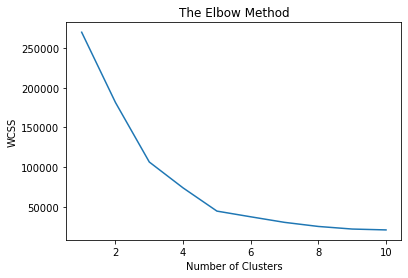

In [87]:
data=df.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[] 
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) 

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


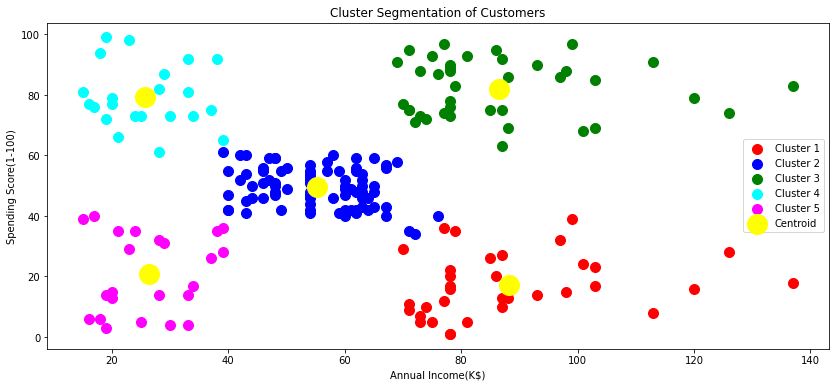

In [88]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)


fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()